# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# 한국은행 API를 활용한 국내경제 데이터 분석 

--- 

<div style="text-align: right"> Final Edition : 2022.11.1<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# <span style="color:gray"> [지난시간] 1. 미국 연방준비은행 세인트루이스 </span>

[FRED(Federal Reserve Economic Data](https://fred.stlouisfed.org/) : 연방 준비 은행 경제 데이터  <BR>

# 2. 한국은행 경제통계 시스템  

[ECOS(Economic Statistics System)](http://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=main) : 한국은행 경제통계 시스템 <BR>  

# <span style="color:gray"> [다음시간] 3. 공공 데이터 포털 </span>

국토부 부동산 실거래가 데이터 수집 API  
오픈소스 라이브러리 PublicDataReader [공식 Github](https://github.com/WooilJeong/PublicDataReader)
 - 부동산 데이터 수집하기
 - 건축물대장 데이터 조회하기
 - 상가업소 데이터 수집하기

### 한국은행 API 사용법 참고 블로그
http://bjecondata.blogspot.com/2019/08/open-api-ecos-ii.html  
https://hayjo.tistory.com/59?category=913163

## 1.1 필요한 Parser(파서) 패키지 설치

[BeautifulSoup 공식홈페이지 - Parser 비교](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

<img src="./data/parser.jpg" style="width: 1000px;" align="center">

In [1]:
# 표 형식의 데이터를 크롤링, 파싱하는 패키지 설치
# !pip install html_table_parser    

In [2]:
# HTML 문서를 트리구조로 분석해주는 라이브러리 # !pip install --upgrade html5lib
# !pip install --upgrade html5lib==1.0b8
# 설치후 커넬 리스타트 해야 합니다.

html 문서를 파싱하는 beatiful soup 업데이트  
html_table_parser 을 설치하면 그에 맞는 버전으로 beautifulsoup4이 설치됩니다.(4.4.1)  
!pip install --upgrade beautifulsoup4 

In [3]:
# !pip uninstall BeautifulSoup
# !pip uninstall BeautifulSoup4
# !pip install BeautifulSoup
# !pip install html_table_parser
# html 문서를 파싱하는 beatiful soup 업데이트
# !pip install --upgrade beautifulsoup4    
# !pip install --upgrade html5lib          
# HTML 문서를 트리구조로 분석해주는 라이브러리
# import bs4
# print(num.__version__)

## 1.2 한국은행 제공코드 결과확인
[한국은행 파이썬 개발가이드](https://ecos.bok.or.kr/api/#/DevGuide/LanguageDevGuide)

In [4]:
import requests 
import xml.etree.ElementTree as ET 

## 호출하려는 OpenAPI URL를 정의합니다.
url = "https://ecos.bok.or.kr/api/StatisticTableList/sample/xml/kr/1/10/102Y004"

# sample : API 인증키
# xml : 데이터 타입
# kr : 한국
# start : 1
# end : 1

# 043Y070 : 지역별 소비유형별 개인 신용카드
# 021Y125 : 소비자물가지수


## 정의된 OpenAPI URL을 호출합니다.
response = requests.get(url)

## http 요청이 성공했을때 API의 리턴값을 가져옵니다.
if response.status_code == 200:
    try:
        contents = response.text
        ecosRoot = ET.fromstring(contents)
      
        ## 호출결과에 오류가 있었는지 확인합니다.
        if ecosRoot[0].text[:4] in ("INFO","ERRO"):
            print(ecosRoot[0].text + " : " + ecosRoot[1].text)

            ## 오류메세지를 확인하고 처리합니다.
        else:
            print(contents)

            ## 결과값을 활용하여 필요한 프로그램을 작성합니다.
    except Exception as e:
        print(str(e))

        ##예외가 발생했을때 처리합니다.
# 종료 태그가 없는 빈 태그(empty tag)는 반드시 끝에 공백과 함께 슬래시(/)를 붙여야 합니다.

<?xml version="1.0" encoding="UTF-8"?>
<StatisticTableList>
  <list_total_count number="true">1</list_total_count>
  <row array="true">
    <P_STAT_CODE>0000000004</P_STAT_CODE>
    <STAT_CODE>102Y004</STAT_CODE>
    <STAT_NAME>1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)</STAT_NAME>
    <CYCLE>M</CYCLE>
    <SRCH_YN>Y</SRCH_YN>
    <ORG_NAME>한국은행</ORG_NAME>
  </row>
</StatisticTableList>


## 1.3 한국은행 경제통계시스템 개발가이드
[통계코드 검색](https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch)

## 1.4 필요한 패키지, 모듈 불러오기

In [5]:
import datetime                     
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

### [참고] 데이터 프레임을 자유자재로 다루기위한 기초  
설명이 잘 되어 있는 블로그 : https://3months.tistory.com/292

## 1.5 한국은행에서 가져올 데이터 프레임 만들기 - 방법1

In [6]:
# 방법1 - {칼럼명 : [데이터], 칼럼명 : [데이터]}
df = pd.DataFrame({
    "통계코드": ['901Y014', '722Y001'],
    "항목명1": ['KOSPI_평균', '한국은행기준금리'],
    "주기": ['M', 'M'],
    "항목코드1": ['1080000', '0101000'],
    "항목코드2": ["",""],
    "항목코드3": ["",""]
    
})

In [7]:
df

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,901Y014,KOSPI_평균,M,1080000,,
1,722Y001,한국은행기준금리,M,0101000,,


In [8]:
# # 방법2  data = [[행별 데이터],[행별 데이터]], index=[], column=[]
# df_1 = pd.DataFrame(data=([['901Y001', '실업률', 'MM', 'AI1AJ'],
#                            ['901Y001', '고용률', 'MM', 'AI1AK']]),
#                     index=[0, 1],
#                     columns=["통계코드", "항목명1", "주기", "항목코드1"])
# df_1

### 1.5.1 항목코드 칼럼추가

In [9]:
# # 칼럼추가 Append a column to `df`
# df.loc[:, '항목코드2'] = pd.Series(['',''], index=df.index)
# df.loc[:, '항목코드3'] = pd.Series(['',''], index=df.index)
# df

In [10]:
df

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,901Y014,KOSPI_평균,M,1080000,,
1,722Y001,한국은행기준금리,M,0101000,,


### 1.5.2 행 데이터 추가

In [11]:
temp = pd.DataFrame(data=[['902Y007', '생산자물가지수','M','KR',"",""]], columns=["통계코드", "항목명1", "주기", "항목코드1","항목코드2", "항목코드3"])

In [12]:
temp

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,902Y007,생산자물가지수,M,KR,,


In [13]:
# df = pd.concat([df, temp])
df

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,901Y014,KOSPI_평균,M,1080000,,
1,722Y001,한국은행기준금리,M,0101000,,


In [14]:
# 기준금리 행 추가
# 통계표 > 2. 한국은행 주요계정 및 기준금리 > 2.6 한국은행 기준금리 및 여수신금리 > 한국은행 기준금리 [010100]

temp = pd.DataFrame(data=[['902Y007', '생산자물가지수','M','KR',"",""]], columns=["통계코드", "항목명1", "주기", "항목코드1","항목코드2", "항목코드3"])

df = pd.concat([df, temp])
df = df.reset_index(drop=True)
df

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,901Y014,KOSPI_평균,M,1080000,,
1,722Y001,한국은행기준금리,M,0101000,,
2,902Y007,생산자물가지수,M,KR,,


###  1.5.3 열 삭제 및 행 삭제

#### 1.5.3.1 열(columns) 삭제

* columns 이름으로 삭제  
df.drop(columns = ['A'])  # 한 개 열을 삭제  
df.drop(columns = ['A','B'])  #여러개 열을 삭제  
<br><br>

* axis 설정을 통해 삭제  
df.drop('A', axis = 1)   #한 개 열을 삭제  
df.drop(['A', 'B'], axis = 1)   #여러개 열을 삭제  
<br><br>

* iloc를 이용한 삭제(Slicing)  
df.iloc[:, 1:] # 0번째 column을 삭제하고 나머지만 남긴다.<br>
df.iloc[:,2:] # 0번째, 1번째 column 삭제 뒤 나머지만 남기기.  
<br><br>    

* loc를 이용한 삭제(Slicing)       <br>
df.loc[:,'B':]  # B열부터 끝까지 출력  
df.loc[:,'A':'B'] # A열부터 B열까지 출력

#### 1.5.3.2 행(row) 삭제
* 인덱스를 이용한 삭제  
df.drop(0)  # index 중 0 행 삭제, default값이 axis = 0<BR>
df.drop([1,2]) # 여러 행 삭제 - 1, 2 행 삭제   

In [15]:
# 열(칼럼)삭제 - 항목코드2 
# df.drop(columns = ['항목코드2'], inplace=True) # 한 개 열을 삭제

In [16]:
# 행(로우) 삭제 - 고용률
# df.drop([1], inplace=True) # 한 개 행을 삭제

In [17]:
# df = df.replace(np.nan,'', regex=True) # regex = True 정규표현식 작동. 문자열 일부만 치환하고 싶은 경우

정규표현식에 대해서는 아래 블로그 공부해보시면 좋습니다. https://ponyozzang.tistory.com/614

## <span style="color:red"> 1.6 각자의 API KEY를 입력하세요  </span>

In [18]:
key = '6L9NIJW1BDGVDJLBO4CA' # 한국은행API 인증코드(개인별 보안자료)

## [Tips] 정규 표현식(正規表現式, 영어: regular expression)
간단히 regexp 또는 regex, rational expression<br>
또는 정규식(正規式)은 특정한 규칙을 가진 문자열의 집합을 표현하는 데 사용하는 형식 언어<br>
특정한 패턴과 일치하는 문자열을 검색, 치환, 제거 하는 기능을 지원함.
[상세한 내용은 점프 투 파이썬 온라인 교재 참고해주세요](https://wikidocs.net/13#f)

### strptime  : 문자열 → 날짜
strptime means string parser, this will convert a string format to datetime.   

### strftime : 날짜 → 문자열
strftime means string formatter, this will format a datetime object to string format.

In [19]:
# name = '홍길동'
# age = 30

In [20]:
# f'나의 이름은 {name}입니다. 나이는 {age}입니다.'

In [21]:
# key=1
# Statcode='0'
# Freq='1'
# Begdate='2'
# Enddate='3'
# Subcode1='4'
# Subcode2='5'
# Subcode3='6'

In [22]:
# url = f'http://ecos.bok.or.kr/api/StatisticSearch/{key}/xml/kr/1/100000/{Statcode}{Freq}{Begdate}{Enddate}{Subcode1}{Subcode2}{Subcode3}'
# url

### 1.6.1 df 표에서 정의한 데이터를 호출하는 함수

In [23]:
def Ecos(Statcode, Statname, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):

    url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + key + '/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/' % (
        Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)
    res = requests.get(url)
    xml = BeautifulSoup(res.text, 'xml')

    # Pandas 데이터프레임으로 전환합니다.
    raw_data = xml.find_all("row")
    date_list = []
    value_list = []

    for item in raw_data:

        value = item.find('DATA_VALUE').text.encode('utf-8')
        date_str = item.find('TIME').text

        # value 값을 실수로 바꿔주고 만약 안되면 NaN을 입력
        try:
            value = float(value)
        except:
            value = np.nan

        date_list.append(datetime.datetime.strptime(date_str, '%Y%m'))
        value_list.append(value)

    df = pd.DataFrame(index=date_list)

    df['%s' % (Statname)] = value_list

    return df

In [24]:
### 1.6.2 위에서 정의한 함수(Ecos)를 사용하여 데이터를 뽑아 날짜 인덱스를 기준으로 세로로 병합(merge)한 함수

In [25]:
df

,통계코드,항목명1,주기,항목코드1,항목코드2,항목코드3
0,901Y014,KOSPI_평균,M,1080000,,
1,722Y001,한국은행기준금리,M,0101000,,
2,902Y007,생산자물가지수,M,KR,,


In [26]:
end = len(df.index)
end

3

In [27]:
# 반복 범위설정을 위해 데이터프레임의 행 개수(마지막 행)를 구합니다
end = len(df.index)

# 2개의 빈 데이터 프레임을 생성합니다.
df_eachrow = pd.DataFrame()
data_table = pd.DataFrame()

# data 목록에 있는 시계열들을 반복적으로 추출합니다.
# 추출기간은 2000년1월 ~ 2021년 7월로 합니다.

START_TIME = '200001'
END_TIME = '202107'

for i in range(0, end):
    df_eachrow = Ecos(df['통계코드'][i], df['항목명1'][i], df['주기'][i], START_TIME,
                   END_TIME, df['항목코드1'][i], df['항목코드2'][i], df['항목코드3'][i])

    if i == 0:
        data_table = df_eachrow
    else:
        data_table = pd.merge(data_table,
                              df_eachrow,
                              left_index=True, # 인덱스를 기준열로 사용  # cf. left_on='time", right_on="시점"
                              right_index=True,# 인덱스를 기준열로 사용
                              how='outer') 

## 1.7 Merge 함수
### [판다스 공식 홈페이지 - pandas.DataFrame.merge ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

![merge](./data/merge.png)

In [28]:
data_table

,KOSPI_평균,한국은행기준금리,생산자물가지수
2000-01-01,NaN,4.75,79.52
2000-02-01,902.73,5.00,79.32
2000-03-01,878.38,5.00,79.27
2000-04-01,779.75,5.00,78.88
2000-05-01,720.77,5.00,78.69
...,...,...,...
2021-03-01,3032.47,0.50,108.06
2021-04-01,3165.08,0.50,109.09
2021-05-01,3169.20,0.50,109.68
2021-06-01,3259.14,0.50,110.26


In [29]:
# 결측치 채워넣기
data_table.fillna(method='backfill', inplace=True) 
data_table

,KOSPI_평균,한국은행기준금리,생산자물가지수
2000-01-01,902.73,4.75,79.52
2000-02-01,902.73,5.00,79.32
2000-03-01,878.38,5.00,79.27
2000-04-01,779.75,5.00,78.88
2000-05-01,720.77,5.00,78.69
...,...,...,...
2021-03-01,3032.47,0.50,108.06
2021-04-01,3165.08,0.50,109.09
2021-05-01,3169.20,0.50,109.68
2021-06-01,3259.14,0.50,110.26


## 1.8 fillna 함수
### [판다스 공식 홈페이지 - pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)<br>
method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
Method to use for filling holes in reindexed Series pad / ffill: propagate last valid observation forward to next valid backfill / bfill: use next valid observation to fill gap.

<AxesSubplot:>

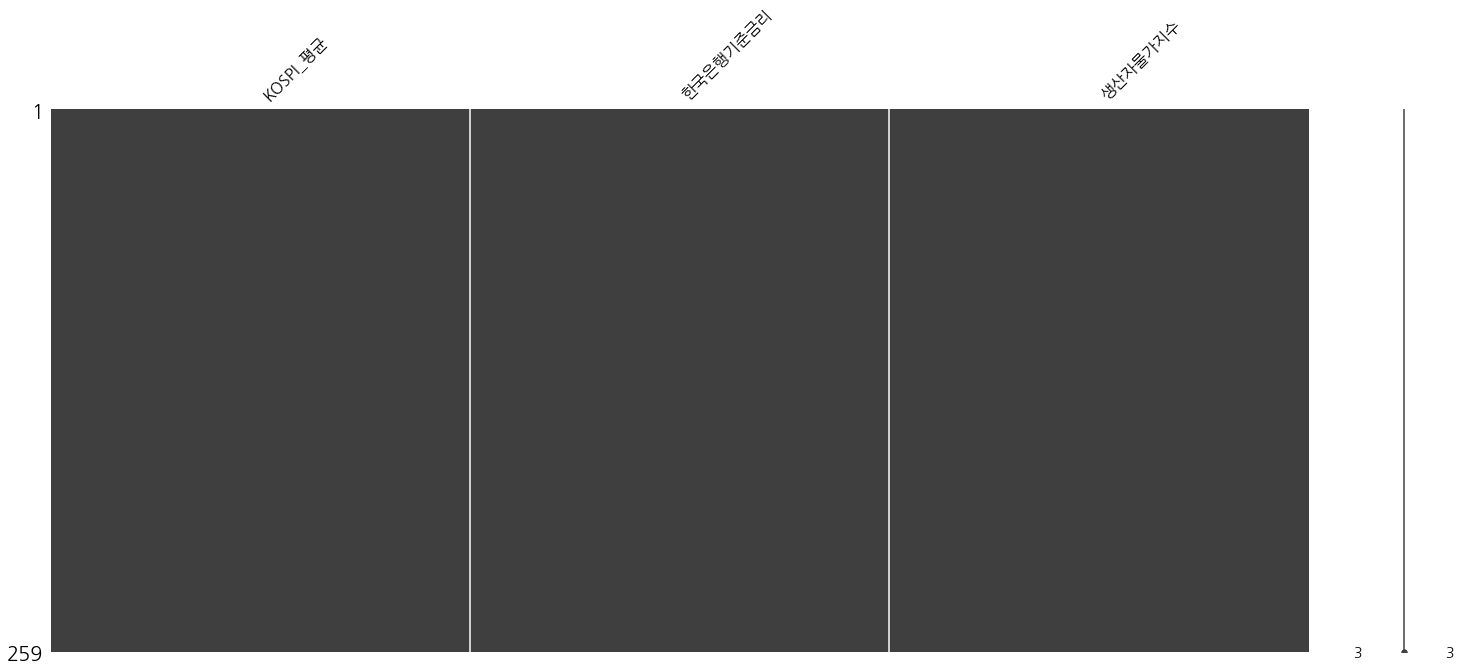

In [30]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
plt.rc('font', family = 'NanumGothic')
msno.matrix(data_table)

In [31]:
data_table.isnull().sum()

KOSPI_평균    0
한국은행기준금리    0
생산자물가지수     0
dtype: int64

In [32]:
data_table

,KOSPI_평균,한국은행기준금리,생산자물가지수
2000-01-01,902.73,4.75,79.52
2000-02-01,902.73,5.00,79.32
2000-03-01,878.38,5.00,79.27
2000-04-01,779.75,5.00,78.88
2000-05-01,720.77,5.00,78.69
...,...,...,...
2021-03-01,3032.47,0.50,108.06
2021-04-01,3165.08,0.50,109.09
2021-05-01,3169.20,0.50,109.68
2021-06-01,3259.14,0.50,110.26


In [33]:
# 다운로드 데이터 저장
file_name = './Ecos_downloaded.xlsx'
writer = pd.ExcelWriter(file_name)

data_table.to_excel(writer,'Series')
writer.save()

# 2. 한국은행 데이터 json 타입 전처리 함수 구현 feat. Class 개념

In [34]:
base = 'http://ecos.bok.or.kr/api/'

In [35]:
start = '1'
end = '2'

STAT_CODE='902Y008'
ITEM_CODE1='KR'

In [36]:
url = base + 'StatisticItemList/' + key \
      + '/json/kr/' + str(start) + '/' + str(end) \
      + '/' + STAT_CODE + '/'+ITEM_CODE1

In [37]:
url

'http://ecos.bok.or.kr/api/StatisticItemList/6L9NIJW1BDGVDJLBO4CA/json/kr/1/2/902Y008/KR'

In [38]:
data = requests.get(url).json()

In [39]:
data

{'StatisticItemList': {'list_total_count': 121,
  'row': [{'STAT_CODE': '902Y008',
    'STAT_NAME': '9.1.2.2. 국제 주요국 소비자물가지수',
    'GRP_CODE': 'Group1',
    'GRP_NAME': '계정항목',
    'ITEM_CODE': 'KR',
    'ITEM_NAME': '한국',
    'P_ITEM_CODE': None,
    'P_ITEM_NAME': None,
    'CYCLE': 'A',
    'START_TIME': '1952',
    'END_TIME': '2021',
    'DATA_CNT': 70,
    'UNIT_NAME': '2010=100',
    'WEIGHT': None},
   {'STAT_CODE': '902Y008',
    'STAT_NAME': '9.1.2.2. 국제 주요국 소비자물가지수',
    'GRP_CODE': 'Group1',
    'GRP_NAME': '계정항목',
    'ITEM_CODE': 'KR',
    'ITEM_NAME': '한국',
    'P_ITEM_CODE': None,
    'P_ITEM_NAME': None,
    'CYCLE': 'M',
    'START_TIME': '195108',
    'END_TIME': '202209',
    'DATA_CNT': 854,
    'UNIT_NAME': '2010=100',
    'WEIGHT': None}]}}

In [40]:
data['StatisticItemList']['row'][0]['END_TIME']

'2021'

In [41]:
data['StatisticItemList']['row'][0]['CYCLE']

'A'

In [42]:
date = data['StatisticItemList']['row'][0]['END_TIME']
cycle = data['StatisticItemList']['row'][0]['CYCLE']

In [43]:
url = base + 'StatisticSearch/' + key \
      + '/json/kr/1/1/' + STAT_CODE + '/' + cycle + '/' \
      + date + '/' + date + '/' + ITEM_CODE1
url 

'http://ecos.bok.or.kr/api/StatisticSearch/6L9NIJW1BDGVDJLBO4CA/json/kr/1/1/902Y008/A/2021/2021/KR'

In [44]:
data = requests.get(url).json()
data

{'StatisticSearch': {'list_total_count': 1,
  'row': [{'STAT_CODE': '902Y008',
    'STAT_NAME': '9.1.2.2. 국제 주요국 소비자물가지수',
    'ITEM_CODE1': 'KR',
    'ITEM_NAME1': '한국',
    'ITEM_CODE2': None,
    'ITEM_NAME2': None,
    'ITEM_CODE3': None,
    'ITEM_NAME3': None,
    'ITEM_CODE4': None,
    'ITEM_NAME4': None,
    'UNIT_NAME': '2010=100',
    'TIME': '2021',
    'DATA_VALUE': '118.67'}]}}

In [45]:
returnDict = {
    'date': date,
    'value': float(data['StatisticSearch']['row'][0]['DATA_VALUE'])
}
print(returnDict)

{'date': '2021', 'value': 118.67}


In [46]:
import requests

class Ecos:
    def __init__(self, Key, STAT_CODE, ITEM_CODE1, count): #초기생성자       
        self.Key = Key
        self.STAT_CODE = STAT_CODE
        self.ITEM_CODE1 = ITEM_CODE1
        self.base = 'http://ecos.bok.or.kr/api/'
        self.count = count # count: StatisticItemList에서 ITEM_CODE1이 STAT_CODE의 몇 번째 항목인지

    def getJSON(self, url):
        return requests.get(url).json()

    def getDate(self):  # 일자 구하기
        url = self.base + 'StatisticItemList/' + self.Key \
              + '/json/kr/' + str(self.count) + '/' + str(self.count) \
              + '/' + self.STAT_CODE
        data = self.getJSON(url)
        return (data['StatisticItemList']['row'][0]['END_TIME'],
                data['StatisticItemList']['row'][0]['CYCLE'])

    def getLatest(self):  # 가장 최근 데이터 수집 함수
        date, cycle = self.getDate()
        url = self.base + 'StatisticSearch/' + self.Key \
              + '/json/kr/1/1/' + self.STAT_CODE + '/' + cycle + '/' \
              + date + '/' + date + '/' + self.ITEM_CODE1
        data = self.getJSON(url)
        if "RESULT" in data:
            url = url.replace(date, self.validDate, 2)
            data = self.getJSON(url)
        returnDict = {
            'date': date,
            'value': float(data['StatisticSearch']['row'][0]['DATA_VALUE'])
        }
        self.validDate = date
        return returnDict



CPI = Ecos(key, STAT_CODE='902Y008', ITEM_CODE1='KR', count=2)#, start=1, end=2) # 최근 소비자 물가지수 CPI  # 최근 소비자 물가지수 CPI '021Y125' > 전세[D01101][2015=100]
print(CPI.getLatest()) # {'date': '202110', 'value': 111.17}


{'date': '202209', 'value': 126.12}


# 3. 통계 기준점 정립

## 3.1 소비자 물가지수 
### 3.2.1 데이터 수집

지출목적별 소비자물가지수(품목 포함, 2015=100)

* 수집경로 : KOSIS 국가통계포털 <https://kosis.kr/>

* 총지수(전국), 전세(전국), 월세(전국)
* 1965.1.1부터 월별 통계 지수. (기준 2015=100)
* 행렬전환 Transposed

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J17001&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0288121992&markType=S&itmNm=%EC%A0%84%EA%B5%AD

### 3.2.2 데이터 불러오기

In [47]:
import pandas as pd
Price_index = pd.read_csv('./data/지출목적별_소비자물가지수_품목_포함__2015100__20210923175813.csv', encoding='cp949')
Price_index

,시점,0 총지수,전세,월세
0,시점,전국,전국,전국
1,1965. 01,2.628,-,-
2,1965. 02,2.686,-,-
3,1965. 03,2.691,-,-
4,1965. 04,2.733,-,-
...,...,...,...,...
676,2021. 04,107.39,109.68,100.51
677,2021. 05,107.46,109.94,100.59
678,2021. 06,107.39,110.09,100.66
679,2021. 07,107.61,110.31,100.72


In [48]:
# 0번째 행 삭제
Price_index = Price_index.drop(index=0, axis=0)
Price_index

,시점,0 총지수,전세,월세
1,1965. 01,2.628,-,-
2,1965. 02,2.686,-,-
3,1965. 03,2.691,-,-
4,1965. 04,2.733,-,-
5,1965. 05,2.788,-,-
...,...,...,...,...
676,2021. 04,107.39,109.68,100.51
677,2021. 05,107.46,109.94,100.59
678,2021. 06,107.39,110.09,100.66
679,2021. 07,107.61,110.31,100.72


In [49]:
# 참고 열삭제
# 'col1', 'col2' 열 삭제
# df = df.drop(columns=['col1', 'col2'], axis=1)

In [50]:
# <!-- (1) pandas DataFrame의 칼럼 이름 바꾸기
#     :  df.columns = ['a', 'b']
#     :  df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True) -->

In [51]:
Price_index.rename(columns = {'0 총지수' : '소비자물가지수'}, inplace = True)

In [52]:
# 결측치 제거 후 인덱스 reset
Price_index = Price_index[Price_index['전세'] !='-'].reset_index(drop=True)
Price_index

,시점,소비자물가지수,전세,월세
0,1975. 01,8.849,8.755,10.481
1,1975. 02,9.009,8.755,10.481
2,1975. 03,9.179,9.122,10.890
3,1975. 04,9.468,9.122,10.890
4,1975. 05,9.808,9.122,10.890
...,...,...,...,...
555,2021. 04,107.39,109.68,100.51
556,2021. 05,107.46,109.94,100.59
557,2021. 06,107.39,110.09,100.66
558,2021. 07,107.61,110.31,100.72


In [53]:
Price_index.columns = ['시점', '소비자물가지수', '전세가격지수', '월세가격지수']
Price_index

,시점,소비자물가지수,전세가격지수,월세가격지수
0,1975. 01,8.849,8.755,10.481
1,1975. 02,9.009,8.755,10.481
2,1975. 03,9.179,9.122,10.890
3,1975. 04,9.468,9.122,10.890
4,1975. 05,9.808,9.122,10.890
...,...,...,...,...
555,2021. 04,107.39,109.68,100.51
556,2021. 05,107.46,109.94,100.59
557,2021. 06,107.39,110.09,100.66
558,2021. 07,107.61,110.31,100.72


In [54]:
# 1번째 행부터 끝행 까지 데이터를 추출
# Price_index = Price_index[1::]

In [55]:
Price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       560 non-null    object
 1   소비자물가지수  560 non-null    object
 2   전세가격지수   560 non-null    object
 3   월세가격지수   560 non-null    object
dtypes: object(4)
memory usage: 17.6+ KB


In [56]:
Price_index['시점'] = pd.to_datetime(Price_index['시점'])

In [57]:
# Price_index = Price_index.apply(pd.to_numeric)
Price_index[['소비자물가지수', '전세가격지수', '월세가격지수']] = Price_index[['소비자물가지수', '전세가격지수', '월세가격지수']].apply(pd.to_numeric)

In [58]:
Price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시점       560 non-null    datetime64[ns]
 1   소비자물가지수  560 non-null    float64       
 2   전세가격지수   560 non-null    float64       
 3   월세가격지수   560 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 17.6 KB


In [59]:
Price_index.head()

,시점,소비자물가지수,전세가격지수,월세가격지수
0,1975-01-01,8.849,8.755,10.481
1,1975-02-01,9.009,8.755,10.481
2,1975-03-01,9.179,9.122,10.890
3,1975-04-01,9.468,9.122,10.890
4,1975-05-01,9.808,9.122,10.890


In [60]:
Price_index[Price_index['전세가격지수'] <= 100]

,시점,소비자물가지수,전세가격지수,월세가격지수
0,1975-01-01,8.849,8.755,10.481
1,1975-02-01,9.009,8.755,10.481
2,1975-03-01,9.179,9.122,10.890
3,1975-04-01,9.468,9.122,10.890
4,1975-05-01,9.808,9.122,10.890
...,...,...,...,...
481,2015-02-01,99.710,98.640,99.860
482,2015-03-01,99.720,98.910,99.900
483,2015-04-01,99.750,99.260,99.930
484,2015-05-01,100.030,99.550,100.000


## 3.2 주택매매가격지수

주택가격지수(KHPI : Korea Housing Price Index)<br>
기준시점과 매기 조사되는 조사시점의 가격비를 이용하여 기준시점이 100인 수치로 환산한 값을 의미

### 3.2.1 데이터 수집

* 수집경로 : KOSIS 국가통계포털 <https://kosis.kr/>
* 작성기관 : 한국부동산원
* 기준년도 : 2021년 6월
* 2012년 부터 집계. 1965.1.1부터 월별 통계 지수. 
(기준 2017.11=100 에서 최근 통계법 개정으로 2021.6=100으로 변경)
* 행렬전환 Transposed
* 다운로드
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J17001&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0288121992&markType=S&itmNm=%EC%A0%84%EA%B5%AD

## 3.2.2 데이터 불러오기

In [61]:
import pandas as pd
APT_index = pd.read_csv('data/유형별_매매가격지수_20221031224545.csv', encoding='cp949')
APT_index

,시점,종합,아파트
0,시점,전국,전국
1,2003.11,61.5,55.4
2,2003.12,61.0,55.1
3,2004.01,60.7,55.0
4,2004.02,60.7,55.1
...,...,...,...
223,2022.05,104.8,106.1
224,2022.06,104.8,106.0
225,2022.07,104.8,105.8
226,2022.08,104.5,105.3


In [62]:
# 1번째 행부터 끝행 까지 데이터를 추출
APT_index= APT_index[1::]
APT_index

,시점,종합,아파트
1,2003.11,61.5,55.4
2,2003.12,61.0,55.1
3,2004.01,60.7,55.0
4,2004.02,60.7,55.1
5,2004.03,60.8,55.4
...,...,...,...
223,2022.05,104.8,106.1
224,2022.06,104.8,106.0
225,2022.07,104.8,105.8
226,2022.08,104.5,105.3


In [63]:
APT_index.columns = ['시점', '주택매매지수', '아파트매매지수']
APT_index

,시점,주택매매지수,아파트매매지수
1,2003.11,61.5,55.4
2,2003.12,61.0,55.1
3,2004.01,60.7,55.0
4,2004.02,60.7,55.1
5,2004.03,60.8,55.4
...,...,...,...
223,2022.05,104.8,106.1
224,2022.06,104.8,106.0
225,2022.07,104.8,105.8
226,2022.08,104.5,105.3


###  3.2.3 데이터 타입반경

In [64]:
APT_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 1 to 227
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       227 non-null    object
 1   주택매매지수   227 non-null    object
 2   아파트매매지수  227 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [65]:
import warnings
warnings.filterwarnings("ignore")

APT_index['시점'] = pd.to_datetime(APT_index['시점'])

In [66]:
# Price_index = Price_index.apply(pd.to_numeric)
APT_index[['주택매매지수', '아파트매매지수']] = APT_index[['주택매매지수', '아파트매매지수']].apply(pd.to_numeric)

In [67]:
# warning 참고
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [68]:
APT_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 1 to 227
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시점       227 non-null    datetime64[ns]
 1   주택매매지수   227 non-null    float64       
 2   아파트매매지수  227 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.4 KB


# 3.3 데이터 병합

소비자물가지수 + 주택매매가격지수

### 3.3.1 Merge 함수(pd.merge_asof)

In [69]:
df_merged = pd.merge_asof(
    Price_index.sort_values(by='시점'), APT_index.sort_values(by='시점'),
    on='시점',  allow_exact_matches=True)
df_merged 

,시점,소비자물가지수,전세가격지수,월세가격지수,주택매매지수,아파트매매지수
0,1975-01-01,8.849,8.755,10.481,NaN,NaN
1,1975-02-01,9.009,8.755,10.481,NaN,NaN
2,1975-03-01,9.179,9.122,10.890,NaN,NaN
3,1975-04-01,9.468,9.122,10.890,NaN,NaN
4,1975-05-01,9.808,9.122,10.890,NaN,NaN
...,...,...,...,...,...,...
555,2021-04-01,107.390,109.680,100.510,98.2,97.4
556,2021-05-01,107.460,109.940,100.590,98.9,98.3
557,2021-06-01,107.390,110.090,100.660,100.0,100.0
558,2021-07-01,107.610,110.310,100.720,100.9,101.2


In [70]:
df_merged.dropna(axis=0, inplace=True)

In [71]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 346 to 559
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   시점       214 non-null    datetime64[ns]
 1   소비자물가지수  214 non-null    float64       
 2   전세가격지수   214 non-null    float64       
 3   월세가격지수   214 non-null    float64       
 4   주택매매지수   214 non-null    float64       
 5   아파트매매지수  214 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.7 KB


## 3.4 그래프 시각화

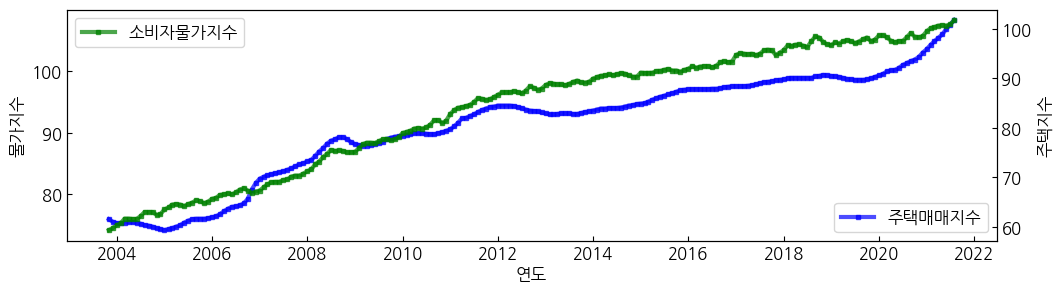

In [72]:
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12
plt.rc('font', family = 'NanumGothic')

# 2. 데이터 준비
x = df_merged['시점']
y1 = df_merged['소비자물가지수']
y2 = df_merged['주택매매지수']

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=3, linewidth=3, alpha=0.7, label='소비자물가지수')
# ax1.set_ylim(0, 18)
ax1.set_xlabel('연도')
ax1.set_ylabel('물가지수')
ax1.tick_params(axis='both', direction='in')


# y2 에 대한 값
ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='blue', markersize=3, linewidth=3, alpha=0.7, label='주택매매지수')
ax2.set_ylabel('주택지수')
ax2.tick_params(axis='y', direction='in')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
# 아래 그림과 같이 zorder가 낮을수록 먼저 그려지고, zorder가 높을수록 나중에 그려집니다.

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

## 3.5 통계적 오류 정정

* 기준시점
  - 소비자물가지수, 전세가격지수, 월세가격지수 : 2015.1 기준
  - 주택매매지수, 아파트매매지수 : 2021.6 기준

In [ ]:
# 1. 병합된 데이터를 확인해봅니다.

In [73]:
df_merged

,시점,소비자물가지수,전세가격지수,월세가격지수,주택매매지수,아파트매매지수
346,2003-11-01,74.227,74.724,88.846,61.5,55.4
347,2003-12-01,74.561,74.913,88.846,61.0,55.1
348,2004-01-01,75.027,75.039,89.015,60.7,55.0
349,2004-02-01,75.359,75.102,88.930,60.7,55.1
350,2004-03-01,76.091,75.164,88.846,60.8,55.4
...,...,...,...,...,...,...
555,2021-04-01,107.390,109.680,100.510,98.2,97.4
556,2021-05-01,107.460,109.940,100.590,98.9,98.3
557,2021-06-01,107.390,110.090,100.660,100.0,100.0
558,2021-07-01,107.610,110.310,100.720,100.9,101.2


In [ ]:
# 2. 칼럼명을 기준시점으로 구분해서 바꿔줍니다.

In [ ]:
df_merged.columns = ['시점', '소비자물가지수(2015=100)', '전세가격지수(2015=100)', '월세가격지수(2015=100)','주택매매지수(2021.6=100)', '아파트매매지수(2021.6=100)']
df_merged

In [75]:
df_merged.columns

Index(['시점', '소비자물가지수(2015=100)', '전세가격지수(2015=100)', '월세가격지수(2015=100)',
       '주택매매지수(2021.6=100)', '아파트매매지수(2021.6=100)'],
      dtype='object')

In [76]:
df_merged.set_index('시점', inplace=True)
df_merged

,소비자물가지수(2015=100),전세가격지수(2015=100),월세가격지수(2015=100),주택매매지수(2021.6=100),아파트매매지수(2021.6=100)
시점,,,,,
2003-11-01,74.227,74.724,88.846,61.5,55.4
2003-12-01,74.561,74.913,88.846,61.0,55.1
2004-01-01,75.027,75.039,89.015,60.7,55.0
2004-02-01,75.359,75.102,88.930,60.7,55.1
2004-03-01,76.091,75.164,88.846,60.8,55.4
...,...,...,...,...,...
2021-04-01,107.390,109.680,100.510,98.2,97.4
2021-05-01,107.460,109.940,100.590,98.9,98.3
2021-06-01,107.390,110.090,100.660,100.0,100.0


In [ ]:
# 3. 기준시점 POINT를 잡습니다.

In [77]:
price_r_point = df_merged.loc['2021-06-01']['소비자물가지수(2015=100)']
junse_r_point = df_merged.loc['2021-06-01']['전세가격지수(2015=100)']
Monthly_r_point = df_merged.loc['2021-06-01']['월세가격지수(2015=100)']

print('기준 소비자물가지수 :', price_r_point)
print('기준 전세가격지수 :', junse_r_point)
print('기준 월세가격지수 :', Monthly_r_point)

기준 소비자물가지수 : 107.39
기준 전세가격지수 : 110.09
기준 월세가격지수 : 100.66


In [ ]:
# 4. 기준시점을 변경해줍니다.

In [78]:
# 2015=100 기준인 각각의 값을 2021.6월 지수로 나눠주고 100을 곱해 환산해줍니다.

df_merged['소비자물가지수(2021.6=100)'] = df_merged['소비자물가지수(2015=100)'] / price_r_point * 100
df_merged['전세가격지수(2021.6=100)'] = df_merged['전세가격지수(2015=100)'] / junse_r_point * 100
df_merged['월세가격지수(2021.6=100)'] = df_merged['월세가격지수(2015=100)'] / Monthly_r_point * 100

In [ ]:
# 5. 소수점 자릿수를 통일해줍니다.

In [79]:
df_merged = df_merged.round(decimals=2)

In [ ]:
# 6. 변경전 기준시점 데이터를 제거해줍니다.(drop)

In [80]:
df_merged.drop(['소비자물가지수(2015=100)','전세가격지수(2015=100)','월세가격지수(2015=100)'], axis=1)

,주택매매지수(2021.6=100),아파트매매지수(2021.6=100),소비자물가지수(2021.6=100),전세가격지수(2021.6=100),월세가격지수(2021.6=100)
시점,,,,,
2003-11-01,61.5,55.4,69.12,67.88,88.26
2003-12-01,61.0,55.1,69.43,68.05,88.26
2004-01-01,60.7,55.0,69.86,68.16,88.43
2004-02-01,60.7,55.1,70.17,68.22,88.35
2004-03-01,60.8,55.4,70.85,68.28,88.26
...,...,...,...,...,...
2021-04-01,98.2,97.4,100.00,99.63,99.85
2021-05-01,98.9,98.3,100.07,99.86,99.93
2021-06-01,100.0,100.0,100.00,100.00,100.00


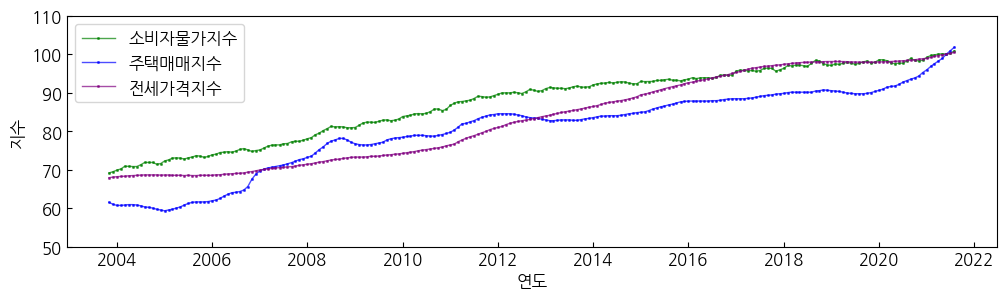

In [83]:
import matplotlib.pyplot as plt

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12
plt.rc('font', family = 'NanumGothic')

# 2. 데이터 준비
x = df_merged.index
y1 = df_merged['소비자물가지수(2021.6=100)']
y2 = df_merged['주택매매지수(2021.6=100)']
y3 = df_merged['전세가격지수(2021.6=100)']

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

# y1 에 대한 값
ax1.plot(x, y1, '-s', color='green', markersize=1, linewidth=1, alpha=0.7, label='소비자물가지수')
ax1.set_ylim(50, 110)
ax1.set_xlabel('연도')
ax1.set_ylabel('지수')
ax1.tick_params(axis='both', direction='in')

# y2 에 대한 값
ax2 = ax1
ax2.plot(x, y2, '-s', color='blue', markersize=1, linewidth=1, alpha=0.7, label='주택매매지수')

# y3 에 대한 값
ax3 = ax1
ax3.plot(x, y3, '-s', color='purple', markersize=1, linewidth=1, alpha=0.7, label='전세가격지수')

# set_zorder() 메서드는 z-축 방향의 순서를 지정합니다.
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')

plt.show()

# matplotlib 참고 자료
공식 튜토리얼 Demo of table function to display a table within a plot.<BR>
https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py